# Prediction using Supervised ML 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [32]:
t=pd.read_csv("http://bit.ly/w-data")

In [33]:
t.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
t.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [35]:
t.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


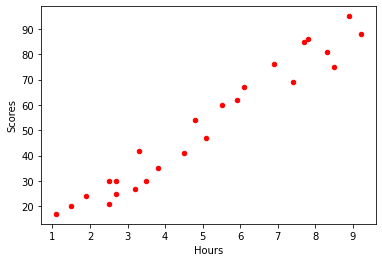

In [36]:
t.plot.scatter("Hours","Scores",c="r")

In [57]:
X = t.iloc[:,:-1].values
y = t.iloc[:,1].values

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [58]:
def regression(model, X, y, split):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=split,
                                                        random_state=0)

    print('Training features shape :', X_train.shape)
    print('Testing features shape : ', X_test.shape)
    print('Training output shape : ', y_train.shape)
    print('Testing output shape : ', y_test.shape)
    print()

    model.fit(X_train, y_train)

    a = model.coef_[0]
    b = model.intercept_

    print("Slope of fitted line :", a)
    print("Intercept of fitted line :", b)
    print()

    y_pred = model.predict(X_train)

    print("RMSE of fit on training data:",
          np.sqrt(mean_squared_error(y_train, y_pred)))
    print("R^2 score of fit on training data :", r2_score(y_train, y_pred))
    print()

    y_pred = model.predict(X_test)

    print("RMSE of fit on test data:",
          np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R^2 score of fit on test data :", r2_score(y_test, y_pred))

    plt.scatter(X_train, y_train, c='blue')
    plt.scatter(X_test, y_test, c='red')
    plt.legend(['Train', 'Test'])
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    x1, x2 = plt.xlim()

    x = np.linspace(x1, x2, 100)
    y = a * x + b

    plt.plot(x, y)

    return model

Training features shape : (18, 1)
Testing features shape :  (7, 1)
Training output shape :  (18,)
Testing output shape :  (7,)

Slope of fitted line : 9.941678339488096
Intercept of fitted line : 1.932204253151646

RMSE of fit on training data: 5.7052937757405875
R^2 score of fit on training data : 0.9484509249326872

RMSE of fit on test data: 4.5092043283688055
R^2 score of fit on test data : 0.9367661043365055


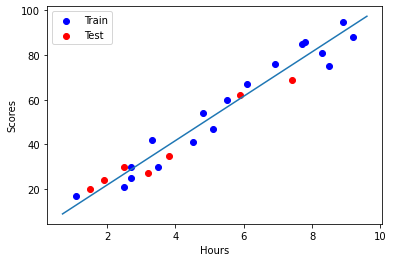

In [59]:
model = regression(LinearRegression(), X, y, 0.25)

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [60]:
h=9.25
predicted_score = model.predict(np.array(h).reshape(-1, 1))[0]

print('Predicted score for a student studying %.2f hours : %.2f' %(h, predicted_score))

Predicted score for a student studying 9.25 hours : 93.89
